# Datavidia ELSIX

## Initialization

In [2]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import os
import re
import nltk
import matplotlib.pyplot as plt

In [215]:
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [33]:
train = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\train.csv")
dirtytrain = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\train.csv")
test = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\test.csv")
# train['review_text'] = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\tr_en_translated.csv")
# test['review_text'] = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\ts_en_translated.csv")

In [23]:
train.head()

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


In [18]:
test.head()

,review_id,review_text
0,7302180ac7160f04a405d8aa7bd6beb8,kasur rusak punggung saya sakit kasurnya ga ...
1,3184c670e170f565c7522eb76a320ba1,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,tempat ridur atas bawah ac nya pararel tdk ...
3,061d388950340070a6ac03fabc9027b0,ac kurang dingin tidak ada snack sperti di foto
4,e62d87c348674b6c06856964f3ab16b8,lumayan untuk guest house dengan standart harg...


## Data Preprocessing

In [219]:
# Null Values
train.isnull().sum()

review_id      0
review_text    0
category       0
dtype: int64

In [34]:
# Clear Non-Alphanumeric and lowercase
edatrain = train.copy()
edatest = test.copy()

edatrain['review_text'] = train['review_text'].apply(lambda x : re.sub('[^a-zA-Z0-9]',' ',x).lower())
edatest['review_text'] = test['review_text'].apply(lambda x : re.sub('[^a-zA-Z0-9]',' ',x).lower())

In [221]:
# Label Specification
labels = train.iloc[:,2].values
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Tokenization
train['tokenized'] = train['review_text'].apply(lambda x : x.split())
test['tokenized'] = test['review_text'].apply(lambda x : x.split())

In [36]:
import random
rand = random.randint(0,len(train.index))
print(train.loc[rand]['review_id'])
print(train.loc[rand]['review_text'])
print(train.loc[rand]['category'])

805a2359e6cb867af9b066337143d888
Bagus hotelnya luas,makanannya enak
1


## Analisis Ulasan Non-Alphanumeric

Akan dicari id ulasan yang tidak bersifat alphanumeric.

In [37]:
# Pembuatan list kosong untuk menginkorporasi 'review_id' yang berisikan konten non-alphanumeric.
problematic = []

# Pembersihan whitespace dari seluruh record dataset.
antinan = train.copy()
antinan = antinan.drop(columns = ['review_text'])
antinan['string'] = edatrain['review_text'].apply(lambda x : re.sub('\s','',x))

# Pencarian seluruh 'review_id' yang tidak memiliki apapun di dalam recordnya.
errors = 0
for i in range (0,len(antinan.index)):
    if antinan['string'][i] == '':
        problematic.append(antinan['review_id'][i])
        errors += 1

print('Found ', errors, ' errors!')   
problematic

Found  21  errors!


['ae3f2336b8246b6214e325e561488b97',
 'cc059398cf5fd3d110967f0b27fad73f',
 '7c65dbafe1efd03da5356a5e77e19c72',
 '617c6594518e1342b1976829604d1a4c',
 'd4fa1af0924e45e2363e56c14de94e89',
 'a2f3073833374832609071e0b5bcd2bb',
 '0ab8e42b7454ed01e09858437009f817',
 'b9e70aef0ed3986f01c036a60370b008',
 '048091bb5c97447e025a6b4e79cb1e53',
 '606825e4db9876c06153cc923cea9a8a',
 'f5ed27898ab4e134179aeca4d17f621a',
 'a0eefc096248721cbfd5a86921458d28',
 '65a010da47a8d91ae429b8817eff0209',
 '1b2513e42654c096053bb446224af202',
 '35b773e77ae8aef0b3b9c50f9973e495',
 '163adeba41019c0c417918a808fb3fd9',
 '98743941ffce62470ce18de7903e52af',
 '61d384887358af1a3ae849f60abd2194',
 'a3772e8bb6fa5f88e83e543379d36d15',
 '7ecfea6c743491983657e8893e4ddac7',
 'ac195cf5ea17eb1d79b3abcc57cffcd0']

Setelah menemukan id ulasan yang bermasalah, selanjutnya akan ditampilkan ulasan-ulasan tersebut.

In [38]:
problematicreviews = train[edatrain['review_id'].apply(lambda x : x in problematic)]
problematicreviews

,review_id,review_text,category,tokenized
952,ae3f2336b8246b6214e325e561488b97,~,0,[~]
3193,cc059398cf5fd3d110967f0b27fad73f,👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻,0,[👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻]
5286,7c65dbafe1efd03da5356a5e77e19c72,😐,0,[😐]
5469,617c6594518e1342b1976829604d1a4c,.. ..\n,0,"[.., ..]"
6536,d4fa1af0924e45e2363e56c14de94e89,,0,[]
7031,a2f3073833374832609071e0b5bcd2bb,------,0,[------]
8191,0ab8e42b7454ed01e09858437009f817,😔,0,[😔]
8435,b9e70aef0ed3986f01c036a60370b008,😞,0,[😞]
8523,048091bb5c97447e025a6b4e79cb1e53,?,0,[?]
8552,606825e4db9876c06153cc923cea9a8a,😢,0,[😢]


## Analisis Panjang Ulasan

Cari panjang ulasan dari "train.csv" dan "test.csv" dengan menggunakan tokenization yang telah dilakukan sebelumnya.

In [41]:
# Pencarian panjang dari tiap list yang ada pada kolom 'tokenized'
edatrain['length_of_review'] = train['tokenized'].apply(lambda x : len(x))
edatest['length_of_review'] = test['tokenized'].apply(lambda x : len(x))

# Menunjukkan kolom 'review_id' serta 'length_of_review'
print(edatrain[['review_id','length_of_review']], '\n', edatest[['review_id','length_of_review']])

                              review_id  length_of_review
0      0fc651bfdd38a3b4ba19ef9d0d1e92e3                29
1      7d8cb2e465c5602e51c1ba8710e8ff16                25
2      1f4447c73e5e1aac462d05b0ecbd5a55                34
3      b9aefbfb0debbfff43f8b268c82b43c0                 8
4      e2afef18bd695fae43d4d53b8c547bd4                 2
...                                 ...               ...
14851  5ed96732e4f1e1e69dfb8669cf507587                 5
14852  b0692bdf4926ee0d58c2d9a0f28b0d62                 3
14853  5217f5f284066f232d7b3c3bbd3cccd2                 9
14854  31ca5a04ccc0dae4eaafc91c9822bede                 4
14855  aadb614310e5ceb79b4c68d14f8dab8a                18

[14856 rows x 2 columns] 
                              review_id  length_of_review
0     7302180ac7160f04a405d8aa7bd6beb8                12
1     3184c670e170f565c7522eb76a320ba1                 1
2     e33abf6bb5d5a9a77c339043b1725dc8                28
3     061d388950340070a6ac03fabc9027b0          

Setelah didapatkan panjang dari tiap ulasan untuk tiap id, maka dapat dilihat karakteristik panjang ulasan untuk kedua dataset yang akan membantu untuk EDA serta pertimbangan konstruksi model.

In [42]:
# Metrik untuk rekapitulasi terkait panjang ulasan.
maxtrain = max(train['length_of_review'])
avgtrain = sum(train['length_of_review'])/len(train.index)
mintrain = min(train['length_of_review'])
devtrain = np.std(train['length_of_review'])
maxtest = max(test['length_of_review'])
avgtest = sum(test['length_of_review'])/len(test.index)
mintest = min(test['length_of_review'])
devtest = np.std(test['length_of_review'])

print('Rekapitulasi dari panjang ulasan:\n')
print('- Train -')
print('Max = ', maxtrain, '\nMin = ', mintrain, '\nAverage = ', avgtrain,'\nStdDev = ', devtrain)
print('\n- Test -')
print('Max = ', maxtest, '\nMin = ', mintest, '\nAverage = ', avgtest, '\nStdDev = ', devtest)

Rekapitulasi dari panjang ulasan:

- Train -
Max =  123 
Min =  0 
Average =  16.4864028002154 
StdDev =  14.228464282477994

- Test -
Max =  133 
Min =  1 
Average =  16.14108777598277 
StdDev =  14.055701848150427


Untuk bisa lebih memahami distribusi dari panjang ulasan yang terdapat di dalam kedua dataset, dilakukan plotting dalam bentuk histogram.

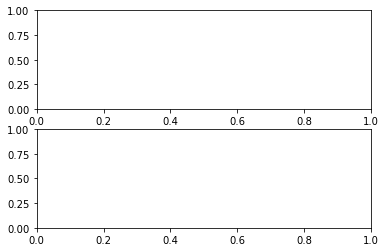

In [46]:
# Penggunaan library plotly untuk menggambarkan Histogram frekuensi dari panjang ulasan.
fig1 = px.histogram(x = edatrain['length_of_review'], nbins = 200)
fig2 = px.histogram(x = edatest['length_of_review'], nbins = 200)
fig1.show()
fig2.show()

## Others Kinda Unused

In [54]:
train_l1 = train[train['length_of_review'] == 1]
listtr_l1 = train_l1['tokenized'].apply(lambda x : str(x))
listtr_l1 = set(listtr_l1.apply(lambda x : re.sub('[^a-zA-Z0-9]','',x)))
test_l1 = test[test['length_of_review'] == 1]
listte_l1 = test_l1['tokenized'].apply(lambda x : str(x))
listte_l1 = set(listte_l1.apply(lambda x : re.sub('[^a-zA-Z0-9]','',x)))

listtr_l1.intersection(listte_l1)

{'berdebu',
 'berisik',
 'biasa',
 'cukuplah',
 'gelap',
 'hmmmm',
 'kacau',
 'kecewa',
 'kotor',
 'kumuh',
 'kurang',
 'payah',
 'pelayanan',
 'poor',
 'ribut',
 'scary',
 'sempit',
 'standart'}

### Others

In [55]:
# Look for ID's that has only 1 to 3 length.
short_forced = []
j = 0
for i in range (0,len(test.index)):
    if test.loc[i]['length_of_review'] <= 3:
        short_forced.append(test.loc[i]['review_id'])
        j += 1

print("Found ", j, " id's with length of 1 to 3.")

Found  360  id's with length of 1 to 3.


###  Bigrams

In [60]:
bigrams = train[train['length_of_review'].apply(lambda x : x == 2)]
bigrams.to_csv(r"D:\Sammy\Competitions\DATAVIDIA\bigrams_found.csv")

In [56]:
# Clean Prediction Results Forcing 1 2 3 to 0

sample_pred = pd.read_csv(r"D:\Sammy\Competitions\DATAVIDIA\sub bert large 5 epoch.csv")
forced_list = []
j = 0

for i in range (0,len(sample_pred.index)):
    if sample_pred.loc[i]['review_id'] in short_forced and sample_pred.loc[i]['category'] == 1:
        sample_pred.loc[i]['category'] = 0
        forced_list.append(sample_pred.loc[i]['review_id'])
        j += 1

print("Forced ", j, " to zero.")

sample_pred.to_csv(r"D:\Sammy\Competitions\DATAVIDIA\forced results.csv")

d:\sammy\compsci\.venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Forced  4  to zero.
